In [259]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [260]:
df = pd.read_csv("democracy.csv")

df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,−6,−6,−6,−6,−6,−6,−6,−6,−6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,−2,−2,−2,−2,−2,−2,−2,−2,−2,−2
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,7,7,9,9,9,9,9,9,9
3,UAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,−8,−8,−8,−8,−8,−8,−8,−8,−8,−8
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,8,8,8,8,8,8,8,8,8


In [261]:
dffull = df.dropna()


In [262]:
# Melt the DataFrame to have years as rows
melted_df = dffull.melt(id_vars=['country'], var_name='year', value_name='democracy')
melted_df['year'] = melted_df['year'].astype(int)  # Convert year to integer

melted_df['democracy'] = melted_df['democracy'].replace('[^0-9]', '-', regex=True)
melted_df['democracy'] = melted_df['democracy'].astype(int)
melted_df.head()

,country,year,democracy
0,Austria,1800,-10
1,China,1800,-6
2,Denmark,1800,-10
3,Spain,1800,-10
4,France,1800,-8


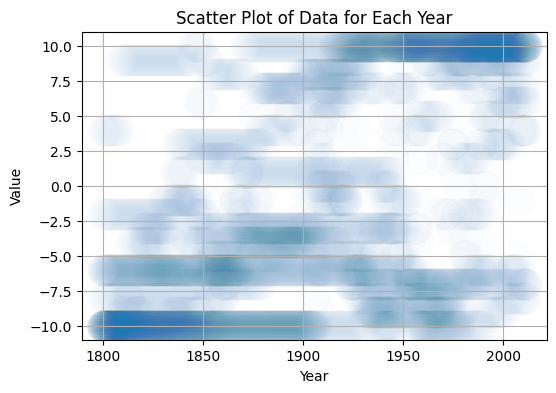

In [263]:
# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(melted_df['year'], melted_df['democracy'], alpha=0.01,s=500)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Scatter Plot of Data for Each Year')
#plt.yticks(range(-10, 11))  # Set y-axis ticks from -10 to 10
plt.grid(True)
plt.show()

In [264]:
# Melt the DataFrame to have years as rows
melted_df = df.melt(id_vars=['country'], var_name='year', value_name='democracy')
melted_df = melted_df.dropna()
melted_df['year'] = melted_df['year'].astype(int)  # Convert year to integer

melted_df['democracy'] = melted_df['democracy'].replace('[^0-9]', '-',regex=True)
melted_df['democracy'] = melted_df['democracy'].astype(int)

melted_df.head()

,country,year,democracy
0,Afghanistan,1800,-6
7,Austria,1800,-10
27,China,1800,-6
43,Denmark,1800,-10
49,Spain,1800,-10


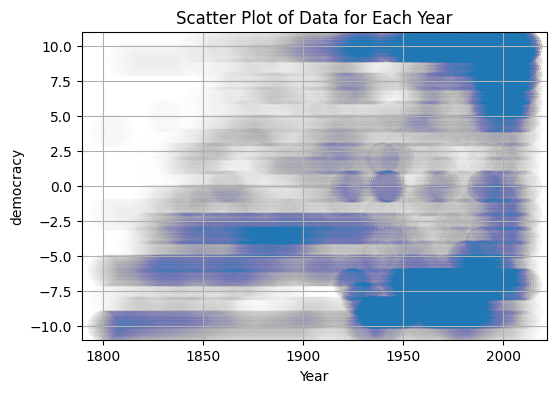

In [265]:
# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(melted_df['year'], melted_df['democracy'], alpha=0.005,s=500)
plt.xlabel('Year')
plt.ylabel('democracy')
plt.title('Scatter Plot of Data for Each Year')
#plt.yticks(range(-10, 11))  # Set y-axis ticks from -10 to 10
plt.grid(True)
plt.show()

In [266]:
melted_df["democracy"]

0        -6
7       -10
27       -6
43      -10
49      -10
         ..
37092    -7
37093    -2
37097     9
37098     7
37099     1
Name: democracy, Length: 17024, dtype: int64

In [293]:
# read in ppp data and merge with democracy

ppp = pd.read_csv("gdp_pcap.csv").melt(id_vars=['country'], var_name='year', value_name='ppp')
ppp['year'] = ppp['year'].astype(int)

ppp['ppp'] = ppp['ppp'].astype(str)


def kToInt(val):
    if val[-1] == "k":
        return int(float(val[:-1])*1000)
    else: 
        return int(val)
ppp['ppp'] = ppp['ppp'].apply(kToInt)


demToPPP = melted_df.merge(ppp,how="inner")

,country,year,democracy,ppp
0,Afghanistan,1800,-6,599
1,Austria,1800,-10,2420
2,China,1800,-6,1320
3,Denmark,1800,-10,2550
4,Spain,1800,-10,2090
...,...,...,...,...
16549,Vietnam,2011,-7,6660
16550,Yemen,2011,-2,3650
16551,South Africa,2011,9,13700
16552,Zambia,2011,7,3150


AttributeError: PathCollection.set() got an unexpected keyword argument 'hue'

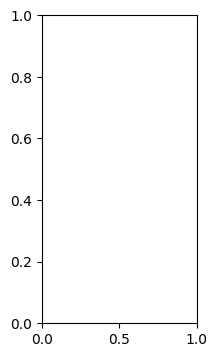

In [301]:
# Scatter plot
plt.figure(figsize=(2, 4))
plt.scatter(demToPPP['ppp'], demToPPP['democracy'], alpha=.1,s=10,hue="continent")
plt.xlabel('PPP')
plt.ylabel('Democracy')
plt.title('PPP and Democracy Score')
#plt.yticks(range(-10, 11))  # Set y-axis ticks from -10 to 10
plt.grid(True)
plt.show()

In [307]:
# read in ppp data and merge with democracy

continents = pd.read_csv("continents.csv")
demToPPP = demToPPP.merge(continents,how="inner")
demToPPP

,country,year,democracy,ppp,continent
0,Afghanistan,1800,-6,599,Asia
1,Afghanistan,1801,-6,599,Asia
2,Afghanistan,1802,-6,599,Asia
3,Afghanistan,1803,-6,599,Asia
4,Afghanistan,1804,-6,599,Asia
...,...,...,...,...,...
16325,Eritrea,2008,-7,1220,Africa
16326,Eritrea,2009,-7,1330,Africa
16327,Eritrea,2010,-7,1440,Africa
16328,Eritrea,2011,-7,1780,Africa


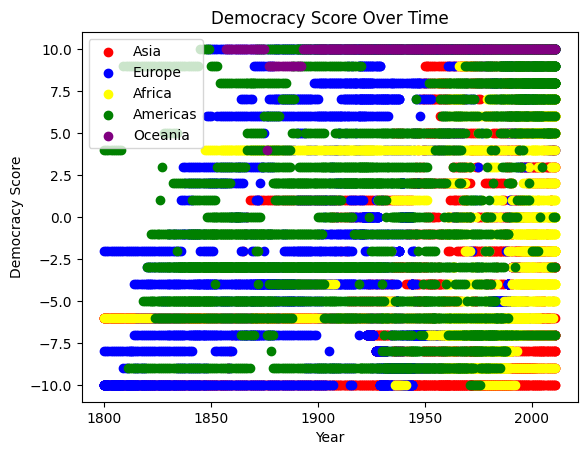

In [319]:
# Create a list of unique continents
continents = demToPPP['continent'].unique()

# Define a color map for each continent
colors = ["red","blue","yellow","green","purple"]

# Create a scatterplot for each continent
for i, continent in enumerate(continents):
    data = demToPPP[demToPPP['continent'] == continent]
    plt.scatter(data['year'], data['democracy'], label=continent, color=colors[i])

# Add title and labels
plt.title('Democracy Score Over Time')
plt.xlabel('Year')
plt.ylabel('Democracy Score')

# Add a legend
plt.legend()

# Show the plot
plt.show()

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353))